In [1]:
import pandas as pd
import geopandas
import matplotlib
import numpy as np
from shapely.geometry import Point, LineString
import math

In [2]:
iller = geopandas.read_file("C:/Users/tosunoglu/Documents/GEOPANDAS/data/gadm41_TUR_1.json")
sular = geopandas.read_file("zip://./data/ne_10m_lakes.zip")

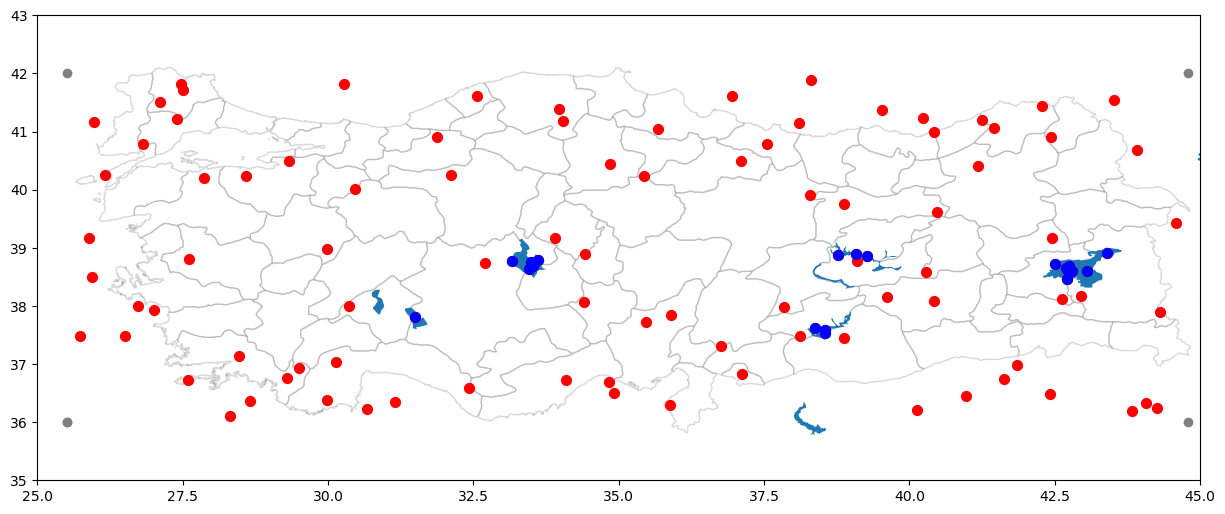

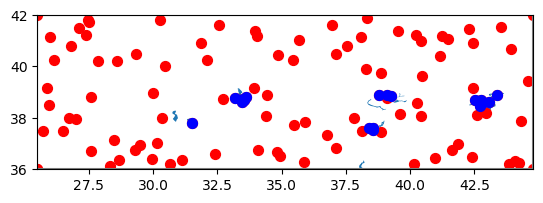

In [5]:
# Uygunluk fonksiyonu
def uygunluk_fonksiyon(noktalar):
    uzakliklar = []
    for i in range(len(noktalar)):
        for j in range(i+1, len(noktalar)):
            uzaklik = np.sqrt((noktalar[i][0] - noktalar[j][0])**2 + (noktalar[i][1] - noktalar[j][1])**2)
            uzakliklar.append(uzaklik)
    ortalama_uzaklik = np.mean(uzakliklar)
    standart_sapma = np.std(uzakliklar)
    uygunluk = ortalama_uzaklik - standart_sapma
    return uygunluk

def homojen_dagitma_alg(dikdortgen, nokta_sayisi, su_nokta_sayisi, sular, iterasyon_sayisi=200):

    nokta_sayisi = nokta_sayisi + su_nokta_sayisi
    
    #if dikdortgen[1] - dikdortgen[0] > 1:
    dikdortgen = (dikdortgen[0] + 0.1, dikdortgen[1] - 0.1, dikdortgen[2], dikdortgen[3])

    #if dikdortgen[3] - dikdortgen[2] > 1:
    dikdortgen = (dikdortgen[0], dikdortgen[1], dikdortgen[2] + 0.1, dikdortgen[3] - 0.1)

    su_noktalar = []
    # Su verisilerinin kesişim kontrolü
    while len(su_noktalar) < su_nokta_sayisi:
        x = np.random.uniform(dikdortgen[0], dikdortgen[1])
        y = np.random.uniform(dikdortgen[2], dikdortgen[3])
        nokta_geometri = Point(x, y)
        kesisim = sular.intersects(nokta_geometri)
        if kesisim.any():
            su_noktalar.append((x, y))

    en_iyi_noktalar = su_noktalar.copy()
    en_iyi_uygunluk = uygunluk_fonksiyon(en_iyi_noktalar)
    
    for _ in range(iterasyon_sayisi):
        noktalar = []
        while len(noktalar) < nokta_sayisi - su_nokta_sayisi:
            x = np.random.uniform(dikdortgen[0], dikdortgen[1])
            y = np.random.uniform(dikdortgen[2], dikdortgen[3])
            noktalar.append((x, y))
        
        noktalar.extend(su_noktalar)
        uygunluk = uygunluk_fonksiyon(noktalar)
        
        if uygunluk > en_iyi_uygunluk:
            en_iyi_uygunluk = uygunluk
            en_iyi_noktalar = noktalar

    return en_iyi_noktalar, su_noktalar


# Dikdörtgen alan sınırları
dikdortgen_alan = (25.5, 44.8, 36, 42)

# Homojen dağılım için nokta sayıları
nokta_sayisi = 90  
su_nokta_sayisi = 20  


# Homojen dağılım için noktaları hesapla
homojen_noktalar, su_noktalar = homojen_dagitma_alg(dikdortgen_alan, nokta_sayisi, su_nokta_sayisi, sular)

# Haritayı oluşturalım
ax = iller.plot(edgecolor='gray', facecolor='none', figsize=(15, 10), alpha=0.3)
sular.plot(ax=ax)
ax.set(xlim=(25, 45), ylim=(35, 43))

# Homojen olarak dağılmış noktaları çizdir (kırmızı renk)
for i, nokta in enumerate(homojen_noktalar):
    iha = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    iha.plot(ax=ax, color='red', marker='o', markersize=50)

# Su noktalarını çizdir (mavi renk)
for i, nokta in enumerate(su_noktalar):
    su = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    su.plot(ax=ax, color='blue', marker='o', markersize=50)

# Dikdörtgenin köşe noktalarını alalım
x0, x1, y0, y1 = dikdortgen_alan

# Dikdörtgenin köşe noktaları
noktalar = [(x0, y0), (x1, y0), (x1, y1), (x0, y1), (x0, y0)]

# Köşe noktalarını grafiğe ekleyelim
df = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([Point(x, y) for x, y in noktalar])})
df.plot(color='gray', ax=ax)

# Çizgiyi oluşturalım
cizgi = LineString(noktalar)

# Köşe noktalarını grafiğe ekleyelim
df_noktalar = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([Point(x, y) for x, y in noktalar])})

# Çizgiyi grafiğe ekleyelim
df_cizgi = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([cizgi])})

# Grafiği çizdirelim
ax = df_noktalar.plot(color='red', marker='o', markersize=50)
df_cizgi.plot(color='gray', ax=ax)

    
sular.plot(ax=ax)
ax.set(xlim=(x0, x1), ylim=(y0, y1))


# Homojen olarak dağılmış noktaları çizdir (kırmızı renk)
for i, nokta in enumerate(homojen_noktalar):
    iha = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    iha.plot(ax=ax, color='red', marker='o', markersize=50)

# Su noktalarını çizdir (mavi renk)
for i, nokta in enumerate(su_noktalar):
    su = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    su.plot(ax=ax, color='blue', marker='o', markersize=50)
    


# Grafik göster
import matplotlib.pyplot as plt
plt.show()

In [6]:
# İstenilen noktanın koordinatlarını belirleyin
x = 42.8
y = 38.6

# İstenilen noktanın geometrisini oluşturun
nokta_geometri = Point(x, y)

# Sular verisini istediğiniz x ve y aralığında sınırlayın
x_min, x_max = 25, 45
y_min, y_max = 35, 43
sular_sınırlı = sular.cx[x_min:x_max, y_min:y_max]

# Noktanın sular verisiyle kesişimini kontrol edin
kesişim = sular_sınırlı.intersects(nokta_geometri)

# Kesişim sonucunu değerlendirin
if kesişim.any():
    print("İstenilen nokta sular verisi üzerinde çakışıyor.")
else:
    print("İstenilen nokta sular verisi üzerinde çakışmıyor.")
    
# Su noktaları ile verilen istenilen nokta arasındaki kesişim durumunu kontrol edin
for i, nokta in enumerate(su_noktalar):
    su_nokta_geometri = Point(nokta[0], nokta[1])
    kesişim = su_nokta_geometri.intersects(sular_sınırlı.unary_union)
    if kesişim:
        print(f"Su nokta {i+1} sular verisi üzerinde çakışıyor.")
    else:
        print(f"Su nokta {i+1} sular verisi üzerinde çakışmıyor.")

İstenilen nokta sular verisi üzerinde çakışıyor.
Su nokta 1 sular verisi üzerinde çakışıyor.
Su nokta 2 sular verisi üzerinde çakışıyor.
Su nokta 3 sular verisi üzerinde çakışıyor.
Su nokta 4 sular verisi üzerinde çakışıyor.
Su nokta 5 sular verisi üzerinde çakışıyor.
Su nokta 6 sular verisi üzerinde çakışıyor.
Su nokta 7 sular verisi üzerinde çakışıyor.
Su nokta 8 sular verisi üzerinde çakışıyor.
Su nokta 9 sular verisi üzerinde çakışıyor.
Su nokta 10 sular verisi üzerinde çakışıyor.
Su nokta 11 sular verisi üzerinde çakışıyor.
Su nokta 12 sular verisi üzerinde çakışıyor.
Su nokta 13 sular verisi üzerinde çakışıyor.
Su nokta 14 sular verisi üzerinde çakışıyor.
Su nokta 15 sular verisi üzerinde çakışıyor.
Su nokta 16 sular verisi üzerinde çakışıyor.
Su nokta 17 sular verisi üzerinde çakışıyor.
Su nokta 18 sular verisi üzerinde çakışıyor.
Su nokta 19 sular verisi üzerinde çakışıyor.
Su nokta 20 sular verisi üzerinde çakışıyor.


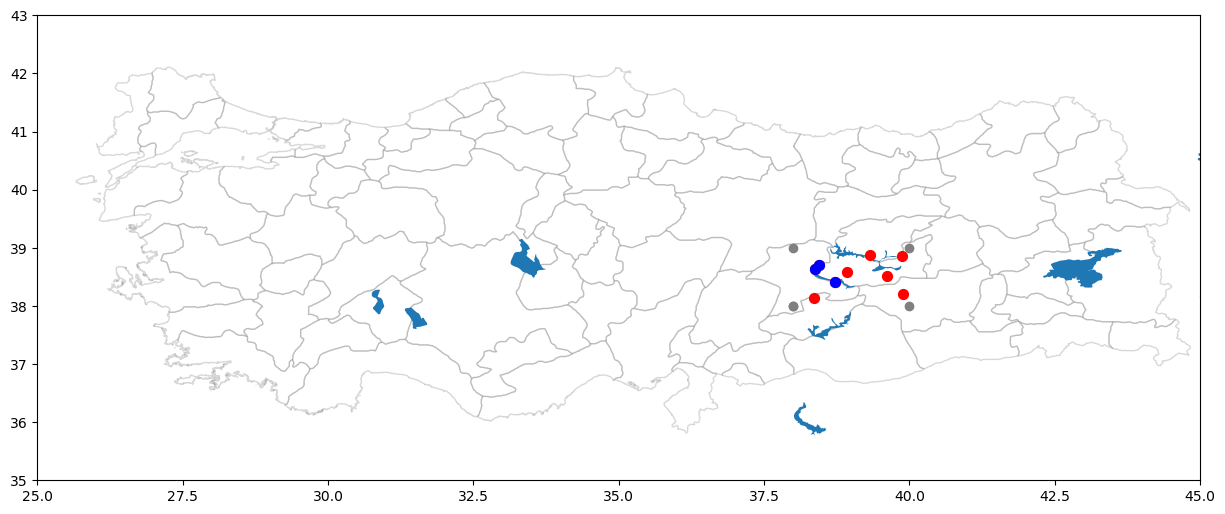

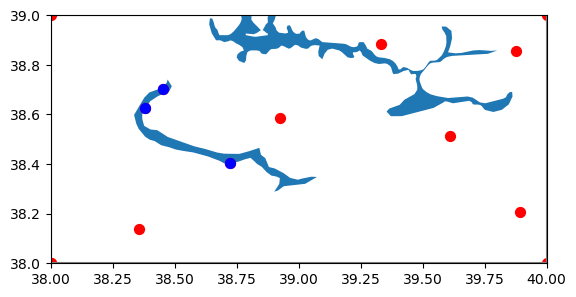

In [15]:
# Dikdörtgen alan sınırları
dikdortgen_alan2 = (38, 40, 38, 39)

# Homojen dağılım için nokta sayıları
nokta_sayisi2 = 6  
su_nokta_sayisi2 = 3  


# Homojen dağılım için noktaları hesapla
homojen_noktalar2, su_noktalar2 = homojen_dagitma_alg(dikdortgen_alan2, nokta_sayisi2, su_nokta_sayisi2, sular)

# Haritayı oluşturalım
ax = iller.plot(edgecolor='gray', facecolor='none', figsize=(15, 10), alpha=0.3)
sular.plot(ax=ax)
ax.set(xlim=(25, 45), ylim=(35, 43))

# Homojen olarak dağılmış noktaları çizdir (kırmızı renk)
for i, nokta in enumerate(homojen_noktalar2):
    iha = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    iha.plot(ax=ax, color='red', marker='o', markersize=50)

# Su noktalarını çizdir (mavi renk)
for i, nokta in enumerate(su_noktalar2):
    su = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    su.plot(ax=ax, color='blue', marker='o', markersize=50)

# Dikdörtgenin köşe noktalarını alalım
x0, x1, y0, y1 = dikdortgen_alan2

# Dikdörtgenin köşe noktaları
noktalar2 = [(x0, y0), (x1, y0), (x1, y1), (x0, y1), (x0, y0)]

# Köşe noktalarını grafiğe ekleyelim
df = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([Point(x, y) for x, y in noktalar2])})
df.plot(color='gray', ax=ax)

# Çizgiyi oluşturalım
cizgi = LineString(noktalar2)

# Köşe noktalarını grafiğe ekleyelim
df_noktalar = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([Point(x, y) for x, y in noktalar2])})

# Çizgiyi grafiğe ekleyelim
df_cizgi = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([cizgi])})

# Grafiği çizdirelim
ax = df_noktalar.plot(color='red', marker='o', markersize=50)
df_cizgi.plot(color='gray', ax=ax)

sular.plot(ax=ax)
ax.set(xlim=(x0, x1), ylim=(y0, y1))

# Homojen olarak dağılmış noktaları çizdir (kırmızı renk)
for i, nokta in enumerate(homojen_noktalar2):
    iha = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    iha.plot(ax=ax, color='red', marker='o', markersize=50)

# Su noktalarını çizdir (mavi renk)
for i, nokta in enumerate(su_noktalar2):
    su = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    su.plot(ax=ax, color='blue', marker='o', markersize=50)

# Grafik göster
import matplotlib.pyplot as plt
plt.show()

In [16]:
def en_uzun_sure(homojen_noktalar, homojen_noktalar2, hiz):
  # en uzun süreyi sıfıra eşitle
  en_uzun = 0
  # her bir araç konumu için
  for arac in homojen_noktalar:
    # en yakın noktanın mesafesini ve süresini sonsuza eşitle
    en_yakin_mesafe = math.inf
    en_yakin_sure = math.inf
    # her bir gidilmesi gereken nokta için
    for nokta in homojen_noktalar2:
      # araç ve nokta arasındaki mesafeyi hesapla
      mesafe = math.dist(arac, nokta)
      # mesafe daha küçükse
      if mesafe < en_yakin_mesafe:
        # en yakın mesafeyi ve süreyi güncelle
        en_yakin_mesafe = mesafe
        en_yakin_sure = mesafe / hiz
    # en yakın süre daha büyükse
    if en_yakin_sure > en_uzun:
      # en uzun süreyi güncelle
      en_uzun = en_yakin_sure
  # en uzun süreyi döndür
  return en_uzun

In [17]:
en_uzun_sure(homojen_noktalar, homojen_noktalar2, 150)*60 

5.06502149786152